# Web Scrapping Classwork

The purpose is to scrap all the pages returned with the entered keyword on pdfdrive  

Richard Luke, 2022/06/05

In [1]:
#importing libraries to use for scrapping
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#for ML
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#function to start a search
search=input("Enter the Book Category to Search : ")
def load(search,number):
    try:
        # + str(page_num)
        URL = f"https://www.pdfdrive.com/search?q={search}&page={number}"
    except:
        print("SORRY! Category not found.")
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")

    return soup

def getdata():
    titles = []
    pages = []
    year = []
    size = []
    downloads = []
    
    try:
        for result in soup.find_all('div', attrs={'class': 'file-right'}):
            title = result.find("h2").text
            titles.append(title)

        for pag in soup.find_all('div', attrs={'class': 'file-info'}):
            page = pag.find("span", class_="fi-pagecount").text
            years = pag.find("span", class_="fi-year").text
            file_size = pag.find("span", class_="fi-size hidemobile").text
            down = pag.find("span", class_="fi-hit").text
            pages.append(page)
            year.append(years)
            size.append(file_size)
            downloads.append(down)

        my_scrapper = {"Book Name": titles,
                    "No of Pages": pages,
                    "Year": year,
                     "FILE SIZE (MB)": size,
                     "DOWNLOADS (Count)": downloads
                    }
        df = pd.DataFrame(my_scrapper)
        df.to_csv('/Users/Richard/Downloads/PDFdrive list.csv', mode='a', header=False,index=False)
        return df
    except:
        print("Failed to append")


def appenddata(df):
    try:
              # split 
        df[["Number.Pages", "Pages"]]=df["No of Pages"].str.split(expand=True)
        df[["Number.Fsize", "File Size"]]=df["FILE SIZE (MB)"].str.split(expand=True)
        df[["Number.Downloads", "Downloads"]]=df["DOWNLOADS (Count)"].str.split(expand=True)
        # prepare string data type for conversion to int
        df['Number.Downloads']=df['Number.Downloads'].str.replace(',','')
        df["Number.Pages"]=df["Number.Pages"].str.replace(',','')
        # drop
        del df["No of Pages"]
        del df["FILE SIZE (MB)"]
        del df["DOWNLOADS (Count)"]

        #save
        df.to_csv('/Users/Richard/Downloads/PDFdrive cleaned list.csv',mode='a', index=False)

    except:
        print('Search returned nothing!')
        
    return df

def cleandata():
    data=pd.read_csv('/Users/Richard/Downloads/PDFdrive cleaned list.csv')
    #remove strings
    try:
         data = data[data["Number.Fsize"].str.contains("Pages|Number.Downloads|Number.Fsize") == False]
    except:
        pass
    # change data type
    data["Number.Pages"]=data["Number.Pages"].astype(str).astype(int)
    data["Year"]=data["Year"].astype(str).astype(int)
    data['Number.Downloads']=data['Number.Downloads'].astype(str).astype(int)
    data["Number.Fsize"]=data["Number.Fsize"].astype(str).astype(float)
    #save to df
    return data
number = 1
while True:
    if number != 50:
        soup=load(search,str(number))
        sleep(20)
        df=getdata()
        sleep(4)
        df=appenddata(df)
        #sleep()
    else:
        break
    number= number+1

Enter the Book Category to Search : python programming
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!
Failed to append
Search returned nothing!


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [3]:
data=cleandata()
data.head()

,Book Name,Year,Number.Pages,Pages,Number.Fsize,File Size,Number.Downloads,Downloads
0,Beginning Programming with Python For Dummies,2014,411,Pages,10.78,MB,59775,Downloads
1,Python 3 MCQ - Multiple Choice Questions n Ans...,2016,225,Pages,637.00,KB,11344,Downloads
2,Python Programming: An In-Depth Guide Into The...,2017,121,Pages,776.00,KB,6025,Downloads
3,Programming with MicroPython: Embedded Program...,2017,210,Pages,17.14,MB,19048,Downloads
4,Python and Tkinter Programming,2005,684,Pages,8.97,MB,48914,Downloads


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Book Name         508 non-null    object 
 1   Year              508 non-null    int32  
 2   Number.Pages      508 non-null    int32  
 3   Pages             508 non-null    object 
 4   Number.Fsize      508 non-null    float64
 5   File Size         508 non-null    object 
 6   Number.Downloads  508 non-null    int32  
 7   Downloads         508 non-null    object 
dtypes: float64(1), int32(3), object(4)
memory usage: 29.8+ KB


In [5]:
round(data.describe(),1)

,Year,Number.Pages,Number.Fsize,Number.Downloads
count,508.0,508.0,508.0,508.0
mean,2013.4,419.3,53.4,4350.7
std,4.0,294.2,166.3,9279.7
min,1996.0,32.0,1.0,20.0
25%,2011.0,224.8,4.1,227.8
50%,2015.0,352.5,7.0,893.0
75%,2016.0,524.0,13.7,3557.2
max,2019.0,1740.0,1011.0,76201.0


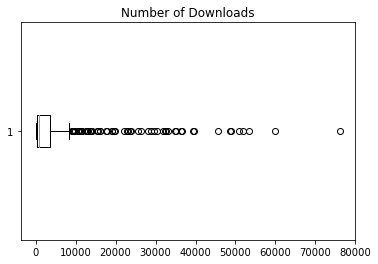

In [6]:
plt.boxplot(data["Number.Downloads"], vert=False),
plt.title("Number of Downloads");

In [7]:
print("The Most Downloaded Book is \n",data[["Book Name","Number.Downloads"]].max())

The Most Downloaded Book is 
 Book Name           python python
Number.Downloads            76201
dtype: object


In [8]:
print("The Least Downloaded Book is \n",data[["Book Name","Number.Downloads"]].min())

The Least Downloaded Book is 
 Book Name            Foundations of Programming Languages
Number.Downloads                                       20
dtype: object


In [9]:
low, high =data["Number.Downloads"].quantile([0.1,0.75])

mask_downloads=data["Number.Downloads"].between(low,high)
data=data[mask_downloads]
round(data.describe(),2)

,Year,Number.Pages,Number.Fsize,Number.Downloads
count,330.00,330.00,330.00,330.00
mean,2013.17,402.55,47.63,975.93
std,3.88,266.91,154.92,919.88
min,1999.00,32.00,1.04,80.00
25%,2010.25,220.00,4.08,252.25
50%,2014.00,349.00,6.89,611.00
75%,2016.00,522.75,13.39,1441.50
max,2019.00,1628.00,1011.00,3533.00


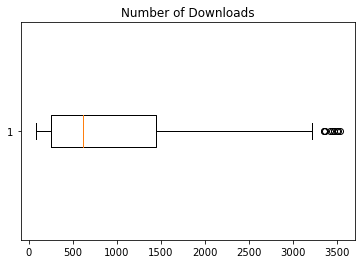

In [10]:
plt.boxplot(data["Number.Downloads"], vert=False),
plt.title("Number of Downloads");

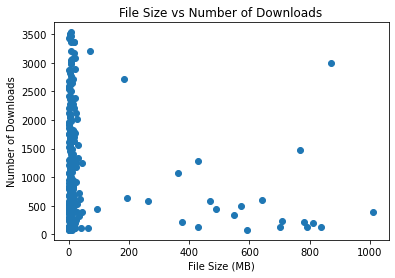

In [11]:
#Relationship between File Size and Number of Downloads
plt.scatter(data["Number.Fsize"],data["Number.Downloads"]),
plt.title("File Size vs Number of Downloads"),
plt.xlabel("File Size (MB)"),
plt.ylabel("Number of Downloads");

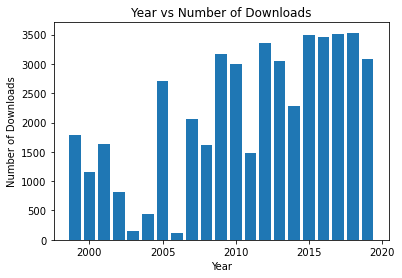

In [12]:
#Relationship between Number of Downloads and Year of Publication
plt.bar(
    data["Year"],data["Number.Downloads"]),
plt.title("Year vs Number of Downloads"),
plt.xlabel("Year"),
plt.ylabel("Number of Downloads");


In [13]:
#Logistic regression

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 24 to 535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Book Name         330 non-null    object 
 1   Year              330 non-null    int32  
 2   Number.Pages      330 non-null    int32  
 3   Pages             330 non-null    object 
 4   Number.Fsize      330 non-null    float64
 5   File Size         330 non-null    object 
 6   Number.Downloads  330 non-null    int32  
 7   Downloads         330 non-null    object 
dtypes: float64(1), int32(3), object(4)
memory usage: 19.3+ KB
